In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors, cm
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import scipy.stats
import matplotlib as mpl
#find Z critical value
scipy.stats.norm.ppf(1-.05/2)

1.959963984540054

# CPC-UTT

In [2]:
composite = np.load('TUTT_anomaly_precip_20degree.npy')
print(composite.shape)
print(np.min(composite))

(15094, 80, 80)
nan


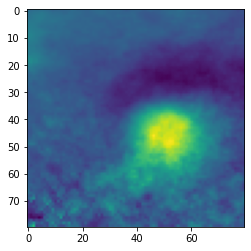

-0.6597459   1.4583493
(80, 80)


In [3]:
mean = np.nanmean(composite, axis=0)
plt.imshow(mean)
plt.show()
print(np.min(mean), ' ', np.max(mean))
std = np.nanstd(composite, axis=0)
print(std.shape)

(80, 80)


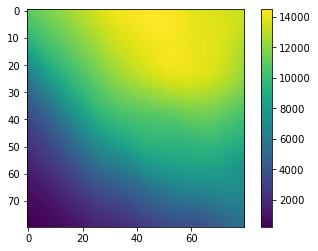

In [4]:
n_samples = np.count_nonzero(~np.isnan(composite), axis=0)
print(n_samples.shape)
plt.imshow(n_samples)
plt.colorbar()

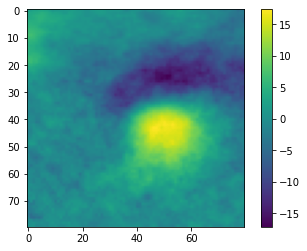

In [5]:
# t_statistic = mean/(std/np.sqrt(composite.shape[0]))
t_statistic = mean/(std/np.sqrt(n_samples))
plt.imshow(t_statistic)
plt.colorbar()

In [6]:
print(np.max(t_statistic))

17.337590774498185


1.959963984540054 1.959963984540054


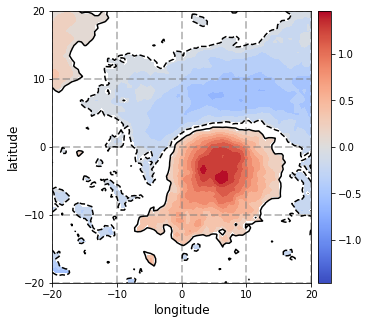

In [7]:
crit1 = scipy.stats.norm.ppf(1-0.05/2)
crit2 = scipy.stats.norm.ppf(1-0.05/2)
print(crit1, crit2)
ind = np.where((t_statistic>-crit1)&(t_statistic<crit1))
plot_mean = mean.copy()
plot_mean[ind]=np.nan
norm = colors.TwoSlopeNorm(vmin=-np.max(mean), vcenter=0, vmax=np.max(mean))
lat = np.linspace(20, -20, 80)
lon = np.linspace(-20, 20, 80)
# fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': cartopy.crs.PlateCarree()})
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.contourf(lon, lat, plot_mean, levels=20, norm=norm, cmap='coolwarm')
ax.contour(lon, lat, t_statistic, levels=[-crit1, crit1], colors='black')

ax.set_xlabel('longitude', fontsize=12)
ax.set_ylabel('latitude', fontsize=12)
ax.set_xticks([-20, -10, 0, 10, 20])
ax.set_yticks([-20, -10, 0, 10, 20])
gl = ax.grid(visible=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

divider = make_axes_locatable(ax)
cax1 = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=False)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="vertical",
)
# plt.savefig('UTT-Compo.png', dpi=120, bbox_inches='tight')
plt.show()

# Eastward

(8539, 80, 80)
nan


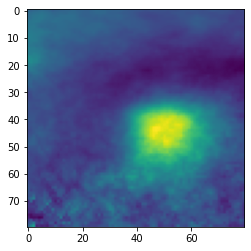

-0.7085893   1.9181403
(80, 80)


In [8]:
east_composite = np.load('east_TUTT_anomaly_precip_20degree.npy')
print(east_composite.shape)
print(np.min(east_composite))
east_mean = np.nanmean(east_composite, axis=0)
plt.imshow(east_mean)
plt.show()
print(np.min(east_mean), ' ', np.max(east_mean))
east_std = np.nanstd(east_composite, axis=0)
print(std.shape)
east_t_statistic = east_mean/(east_std/np.sqrt(east_composite.shape[0]))

(80, 80)


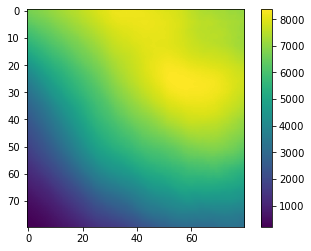

In [9]:
n_samples = np.count_nonzero(~np.isnan(east_composite), axis=0)
print(n_samples.shape)
plt.imshow(n_samples)
plt.colorbar()

In [10]:
east_t_statistic = east_mean/(east_std/np.sqrt(n_samples))

1.959963984540054 1.959963984540054


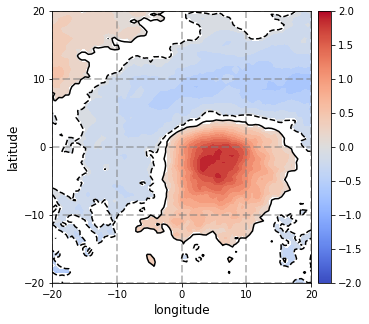

In [11]:
crit1 = scipy.stats.norm.ppf(1-0.05/2)
crit2 = scipy.stats.norm.ppf(1-0.05/2)
print(crit1, crit2)
ind = np.where((east_t_statistic>-crit1)&(east_t_statistic<crit1))
plot_mean = east_mean.copy()
plot_mean[ind]=np.nan
norm = colors.TwoSlopeNorm(vmin=-2, vcenter=0, vmax=2)
lat = np.linspace(20, -20, 80)
lon = np.linspace(-20, 20, 80)
# fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': cartopy.crs.PlateCarree()})
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.contourf(lon, lat, plot_mean, levels=20, norm=norm, cmap='coolwarm')
ax.contour(lon, lat, east_t_statistic, levels=[-crit1, crit1], colors='black')

ax.set_xlabel('longitude', fontsize=12)
ax.set_ylabel('latitude', fontsize=12)
ax.set_xticks([-20, -10, 0, 10, 20])
ax.set_yticks([-20, -10, 0, 10, 20])
gl = ax.grid(visible=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

divider = make_axes_locatable(ax)
cax1 = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=False)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="vertical",
)
plt.show()

# Westward

(6555, 80, 80)
nan


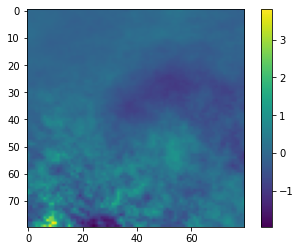

-1.9539806   3.798302
(80, 80)


In [13]:
west_composite = np.load('west_TUTT_anomaly_precip_20degree.npy')
print(west_composite.shape)
print(np.min(west_composite))
west_mean = np.nanmean(west_composite, axis=0)
plt.imshow(west_mean)
plt.colorbar()
plt.show()
print(np.min(west_mean), ' ', np.max(west_mean))
west_std = np.nanstd(west_composite, axis=0)
print(west_std.shape)
# west_t_statistic = mean/(std/np.sqrt(west_composite.shape[0]))

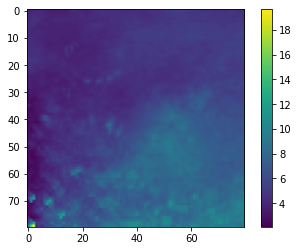

In [14]:
plt.imshow(std)
plt.colorbar()

(80, 80)


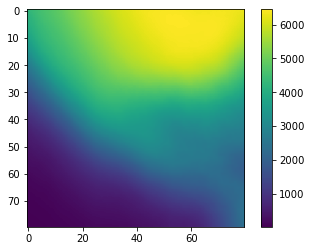

In [15]:
n_samples = np.count_nonzero(~np.isnan(west_composite), axis=0)
print(n_samples.shape)
plt.imshow(n_samples)
plt.colorbar()

In [16]:
west_t_statistic = west_mean/(west_std/np.sqrt(n_samples))

2177


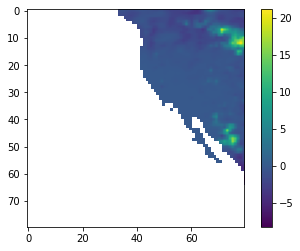

In [17]:
ind = np.random.randint(6000)
print(ind)
plt.imshow(composite[ind])
plt.colorbar()

1.959963984540054 1.959963984540054


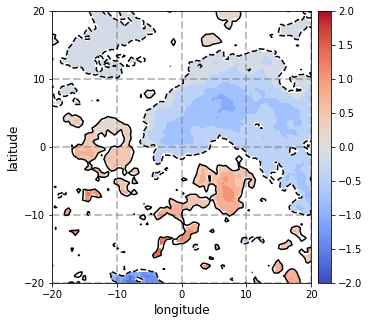

In [18]:
crit1 = scipy.stats.norm.ppf(1-0.05/2)
crit2 = scipy.stats.norm.ppf(1-0.05/2)
print(crit1, crit2)
ind = np.where((west_t_statistic>-crit1)&(west_t_statistic<crit1))
plot_mean = west_mean.copy()
plot_mean[ind]=np.nan
norm = colors.TwoSlopeNorm(vmin=-2, vcenter=0, vmax=2)
lat = np.linspace(20, -20, 80)
lon = np.linspace(-20, 20, 80)
# fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': cartopy.crs.PlateCarree()})
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.contourf(lon, lat, plot_mean, levels=20, norm=norm, cmap='coolwarm')
ax.contour(lon, lat, west_t_statistic, levels=[-crit1, crit1], colors='black')

ax.set_xlabel('longitude', fontsize=12)
ax.set_ylabel('latitude', fontsize=12)
ax.set_xticks([-20, -10, 0, 10, 20])
ax.set_yticks([-20, -10, 0, 10, 20])
gl = ax.grid(visible=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

divider = make_axes_locatable(ax)
cax1 = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=False)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="vertical",
)
plt.show()

1.959963984540054 1.959963984540054


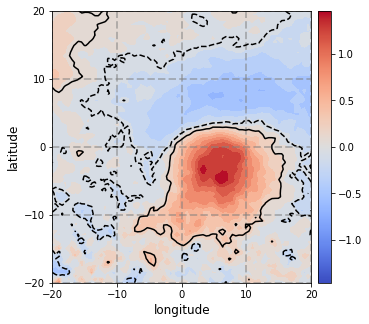

In [19]:
crit1 = scipy.stats.norm.ppf(1-0.05/2)
crit2 = scipy.stats.norm.ppf(1-0.05/2)
print(crit1, crit2)
ind = np.where((t_statistic>-crit1)&(t_statistic<crit1))
plot_mean = mean.copy()
# plot_mean[ind]=np.nan
norm = colors.TwoSlopeNorm(vmin=-np.max(mean), vcenter=0, vmax=np.max(mean))
lat = np.linspace(20, -20, 80)
lon = np.linspace(-20, 20, 80)
# fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': cartopy.crs.PlateCarree()})
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.contourf(lon, lat, plot_mean, levels=20, norm=norm, cmap='coolwarm')
ax.contour(lon, lat, t_statistic, levels=[-crit1, crit1], colors='black')

ax.set_xlabel('longitude', fontsize=12)
ax.set_ylabel('latitude', fontsize=12)
ax.set_xticks([-20, -10, 0, 10, 20])
ax.set_yticks([-20, -10, 0, 10, 20])
gl = ax.grid(visible=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

divider = make_axes_locatable(ax)
cax1 = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=False)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="vertical",
)
plt.show()

# All

In [20]:
def add_latlon(ax):
    ax.set_xticks([-20, -10, 0, 10, 20])
    ax.set_yticks([-20, -10, 0, 10, 20])
    gl = ax.grid(visible=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')

/tmp/ipykernel_203409/4038806529.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


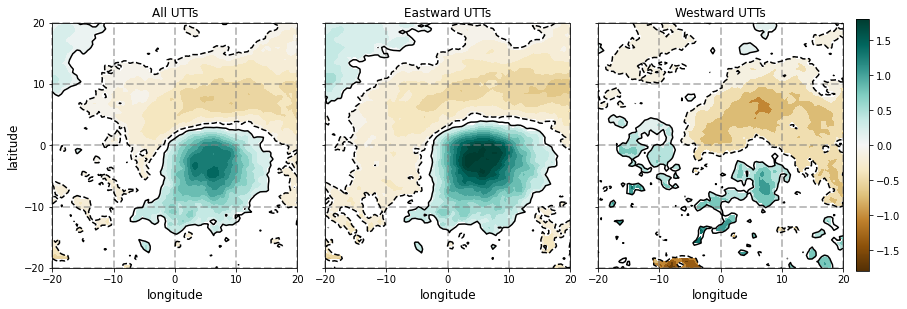

In [22]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(131, projection=cartopy.crs.PlateCarree())
ind = np.where((t_statistic>-crit1)&(t_statistic<crit1))
plot_mean = mean.copy()
plot_mean[ind]=np.nan
norm = colors.TwoSlopeNorm(vmin=-1.8, vcenter=0, vmax=1.8)
lat = np.linspace(20, -20, 80)
lon = np.linspace(-20, 20, 80)
ax.contourf(lon, lat, plot_mean, levels=20, norm=norm, cmap='BrBG')
ax.contour(lon, lat, t_statistic, levels=[-crit1, crit1], colors='black')
ax.set_xlabel('longitude', fontsize=12)
ax.set_ylabel('latitude', fontsize=12)
ax.set_title('All UTTs')
add_latlon(ax)
ax = fig.add_subplot(132, projection=cartopy.crs.PlateCarree())
ind = np.where((east_t_statistic>-crit1)&(east_t_statistic<crit1))
plot_mean = east_mean.copy()
plot_mean[ind]=np.nan
ax.contourf(lon, lat, plot_mean, levels=20, norm=norm, cmap='BrBG')
ax.contour(lon, lat, east_t_statistic, levels=[-crit1, crit1], colors='black')
ax.set_title('Eastward UTTs')
add_latlon(ax)
ax.set_yticklabels([])
ax.grid(True)
ax.set_xlabel('longitude', fontsize=12)
ax = fig.add_subplot(133, projection=cartopy.crs.PlateCarree())
ind = np.where((west_t_statistic>-crit1)&(west_t_statistic<crit1))
plot_mean = west_mean.copy()
plot_mean[ind]=np.nan
ax.contourf(lon, lat, plot_mean, levels=20, norm=norm, cmap='BrBG')
ax.contour(lon, lat, west_t_statistic, levels=[-crit1, crit1], colors='black')
ax.set_title('Westward UTTs')
ax.set_xlabel('longitude', fontsize=12)
add_latlon(ax)
ax.set_yticklabels([])
ax.grid(True)
fig.subplots_adjust(right=0.80)
cbar_ax = fig.add_axes([0.995, 0.15, 0.015, 0.70])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="BrBG"), cax=cbar_ax)
plt.tight_layout()
plt.savefig('UTT-Compo-3.png', dpi=120, bbox_inches='tight')
plt.show()

In [ ]:
xlbl = ax.xaxis.get_label()
print(xlbl)
ylbl = ax.yaxis.get_label()
print(ylbl)


In [ ]:
trmm_composite = np.load('TUTT_anomaly_trmm_20degree.npy')
print(trmm_composite.shape)
print(np.min(trmm_composite))
trmm_count = np.load('TUTT_anomaly_trmm_20degree_count.npy')
print(np.min(trmm_count.flatten()))
print(np.max(trmm_count.flatten()))

In [ ]:
mean = np.nanmean(trmm_composite, axis=0)
plt.imshow(mean)
plt.show()
print(np.min(mean), ' ', np.max(mean))
std = np.nanstd(trmm_composite, axis=0)
print(std.shape)

In [ ]:
plt.imshow(trmm_count)
plt.colorbar()
plt.show()

In [ ]:
t_statistic = mean/(std/np.sqrt(trmm_count))
plt.imshow(t_statistic)
plt.colorbar()

In [ ]:
crit1 = scipy.stats.norm.ppf(1-0.05/2)
crit2 = scipy.stats.norm.ppf(1-0.05/2)
print(crit1, crit2)
ind = np.where((t_statistic>-crit1)&(t_statistic<crit1))
plot_mean = mean.copy()
plot_mean[ind]=np.nan
norm = colors.TwoSlopeNorm(vmin=-np.max(mean), vcenter=0, vmax=np.max(mean))
lat = np.linspace(-20, 20, 160)
lon = np.linspace(-20, 20, 160)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.contourf(lon, lat, plot_mean, levels=20, norm=norm, cmap='coolwarm')
ax.contour(lon, lat, t_statistic, levels=[-crit1, crit1], colors='black')

ax.set_xlabel('longitude', fontsize=12)
ax.set_ylabel('latitude', fontsize=12)
ax.set_xticks([-20, -10, 0, 10, 20])
ax.set_yticks([-20, -10, 0, 10, 20])
gl = ax.grid(visible=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

divider = make_axes_locatable(ax)
cax1 = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes, pack_start=False)
fig.add_axes(cax1)
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap="coolwarm"),
    cax=cax1,
    orientation="vertical",
)

plt.show()